# 국내주식과 미국주식의 상관 분석

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

파이낸셜데이터 리더 설명 링크 : https://github.com/FinanceData/FinanceDataReader

In [2]:
pip install -U finance-datareader

In [3]:
import FinanceDataReader as fdr

2010년 7월 1일을 기준으로 데이터 로드

## 데이터 로드

In [4]:
standard_date = '2010-07-01'
dow = fdr.DataReader('DJI',standard_date) #다우존스
dow

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-07-01,9732.53,9773.27,9834.71,9596.04,262820000.0,-0.0042
2010-07-02,9686.48,9732.23,9798.19,9603.80,199570000.0,-0.0047
2010-07-06,9743.62,9689.21,9880.76,9648.26,216710000.0,0.0059
2010-07-07,10018.28,9736.85,10029.93,9716.38,219560000.0,0.0282
2010-07-08,10138.99,10019.26,10175.02,9987.02,192220000.0,0.0120
...,...,...,...,...,...,...
2021-07-19,33963.29,34264.35,34264.35,33742.07,414090000.0,-0.0209
2021-07-20,34511.86,33981.79,34621.79,33981.79,357970000.0,0.0162
2021-07-21,34797.74,34556.96,34819.75,34556.96,299440000.0,0.0083


In [5]:
kospi = fdr.DataReader('KS11', standard_date) #코스피
kospi

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-07-01,1686.24,1687.00,1693.90,1664.54,3.276600e+08,-0.0071
2010-07-02,1671.82,1688.95,1693.75,1667.38,3.449400e+08,-0.0086
2010-07-05,1675.37,1675.43,1680.39,1664.22,3.566200e+08,0.0021
2010-07-06,1684.94,1664.87,1684.94,1650.30,3.374900e+08,0.0057
2010-07-07,1675.65,1685.77,1685.77,1668.61,3.457000e+08,-0.0055
...,...,...,...,...,...,...
2021-07-19,3244.04,3258.87,3258.87,3236.39,1.100000e+09,-0.0100
2021-07-20,3232.70,3223.24,3234.80,3214.42,9.796700e+08,-0.0035
2021-07-21,3215.91,3251.13,3252.25,3215.91,9.903300e+08,-0.0052


## 시각화

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

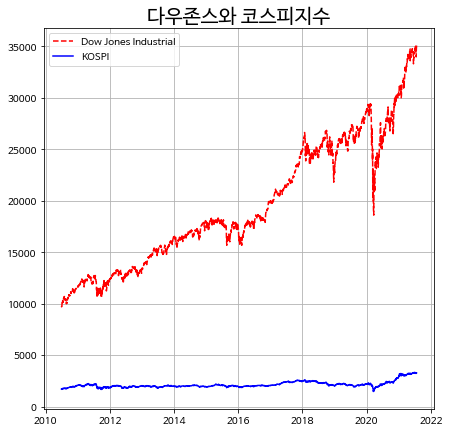

In [7]:
plt.figure(figsize=(7, 7))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.title('다우존스와 코스피지수',fontsize=20)
plt.legend(loc='best')
plt.show()

- 두 종목의 가격의 크기가 너무 달라 서로 비교하기 어렵다.
- 가격의 절대값 비교가 아닌 변동률 비교를 통해서 둘 다 서로 비슷하게 움직였는지를 판단하여 두 대상의 상관관계를 구하는 것이 더 용이

#### 변동률 구하기
- 현재 종가를 특정 시점의 종가로 나누어 변동률을 구함
- 오늘의 종가를 특정일의 종가로 나눈 뒤 100을 곱하면, 특정일의 종가 대비 오늘 종가의 변동률을 구할 수 있음
- 이렇게 가격이 다른 두 주식 종목의 수익률를 비교하는 방법을 지수화라고 함

In [8]:
d = (dow.Close / dow.Close.loc[standard_date]) * 100
k = (kospi.Close / kospi.Close.loc[standard_date]) * 100

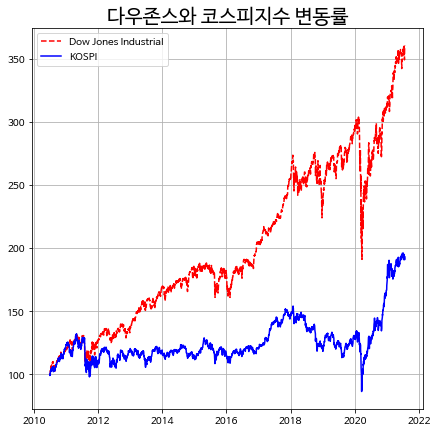

In [9]:
plt.figure(figsize=(7, 7))
plt.title('다우존스와 코스피지수 변동률',fontsize=20)
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 산점도 분석

산점도 분석을 위해 데이터 수 맞추기

In [10]:
import pandas as pd

In [11]:
df =  pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
df

,DOW,KOSPI
Date,,
2010-07-01,9732.53,1686.24
2010-07-02,9686.48,1671.82
2010-07-05,NaN,1675.37
2010-07-06,9743.62,1684.94
2010-07-07,10018.28,1675.65
...,...,...
2021-07-19,33963.29,3244.04
2021-07-20,34511.86,3232.70
2021-07-21,34797.74,3215.91


In [12]:
df.isnull().sum()

DOW       85
KOSPI    137
dtype: int64

### 결측치 채우기

In [13]:
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
df

,DOW,KOSPI
Date,,
2010-07-01,9732.53,1686.24
2010-07-02,9686.48,1671.82
2010-07-05,9743.62,1675.37
2010-07-06,9743.62,1684.94
2010-07-07,10018.28,1675.65
...,...,...
2021-07-19,33963.29,3244.04
2021-07-20,34511.86,3232.70
2021-07-21,34797.74,3215.91


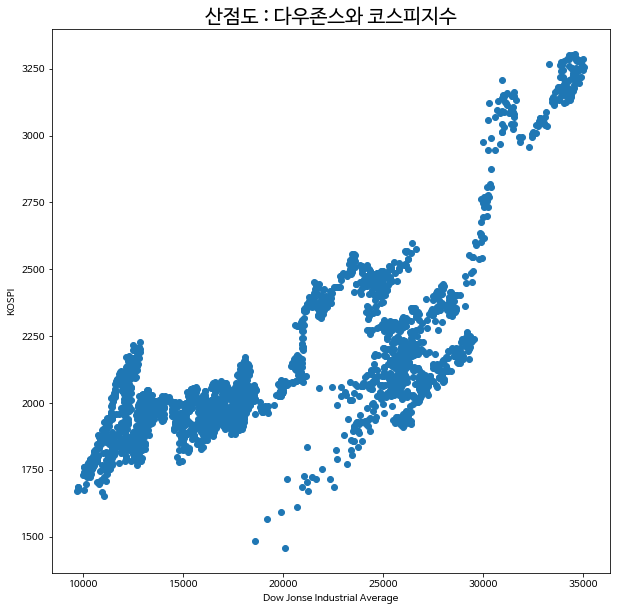

In [14]:
plt.figure(figsize=(10, 10))
plt.title('산점도 : 다우존스와 코스피지수',fontsize=20)
plt.xlabel('Dow Jonse Industrial Average')
plt.ylabel('KOSPI')
plt.scatter(df['DOW'], df['KOSPI'])

## 선형 회귀 분석

### 사이파이를 이용한 선형 회귀

다우존스 지수로부터 코스피 지수를 예측

In [15]:
!pip install scipy

In [16]:
from scipy import stats

* model = stats.linregress(독립 변수 x, 종속 변수 y)  
* model.slope : 기울기  
* model.intercept : y절편

In [17]:
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.037579050604805715, intercept=1391.4901953723474, rvalue=0.7663662748292898, pvalue=0.0, stderr=0.0005883066014326273)

In [18]:
# 기울기만 별도 출력
regr.slope

0.037579050604805715

In [19]:
# Y 절편만 별도 출력
regr.intercept

1391.4901953723474

* slope : 찾아낸 기울기  
* intercpet : 찾아낸 y절편  
* rvalue : r값 (상관계수)  
* pvalue : p값  
* stderr : 표준편차

### 선형 회귀 수식
$$코스피 지수 = 0.038 × 다우존스 지수 + 1391$$

## 상관 계수

In [20]:
corr = df.corr()
corr

,DOW,KOSPI
DOW,1.000000,0.766366
KOSPI,0.766366,1.000000


In [21]:
r_value = df['DOW'].corr(df['KOSPI'])
r_value   #상관 계수

0.7663662748292898

In [22]:
r_squared = r_value ** 2 
r_squared   #결정 계수

0.5873172671957225

- 결정 계수(R-squared)는 관측된 데이터에서 추정한 회귀선이 실제로 데이터를 어느 정도 설명하는지를 나타내는 계수
- 두 변수의 상관관계 정도를 나타내는 상관 계수를 제곱한 값

  

- 결정 계수가 1이면 선형 회귀 모델이 완벽하게 데이터를 설명한다는 의미
- 또는, 선형 회귀 직선 위에 모든 데이터가 다 올라가있다는 의미
- 결정 계수가 0이면 선형 회귀 모델(즉, 직선)이 전혀 변수 사이의 관계를 설명하지 못한다는 의미

In [23]:
regr_line = f'Y = {regr.slope:.3f} * X + {regr.intercept:.2f}'
regr_line

'Y = 0.038 * X + 1391.49'

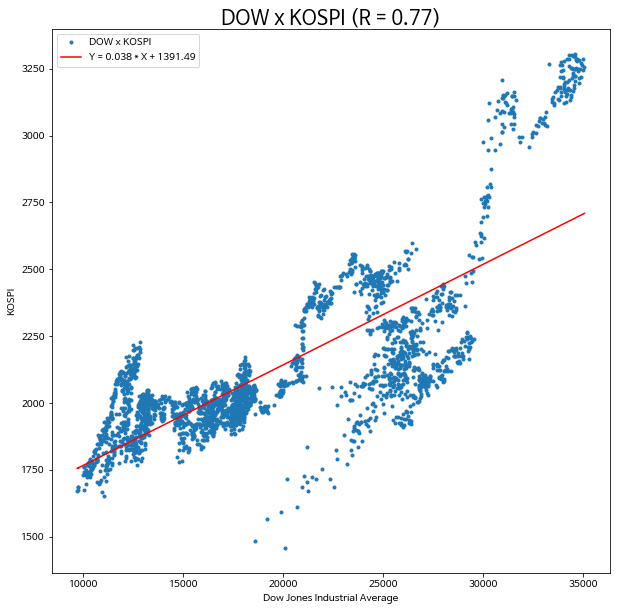

In [24]:
plt.figure(figsize=(10,10))
plt.plot(df['DOW'], df['KOSPI'], '.')
plt.plot(df['DOW'], regr.slope * df['DOW'] + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})',fontsize=20)
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

### 리스크 완화

노벨경제학상을 수상한 해리 마코위츠 박사가 체계화한 현대 포트폴리오 이론 : 

**'투자에 대한 수익과 위험은 평균과 분산으로 나타낼 수 있으며, 상관관계가 낮은 자산을 대상으로 분산 투자하면 위험을 감소시킬 수 있다'**

- 상관 계수 : +1.0 -> 리스크 완화 효과가 없음  
- 상관 계수 : +0.5 -> 중간 정도의 리스크 완화 효과가 있음  
- 상관 계수 : 0 -> 상당한 리스크 완화 효과가 있음  
- 상관 계수 : -0.5 -> 대부분의 리스크를 제거함  
- 상관 계수 : -1.0 -> 모든 리스크를 제거함.

### 히트맵(heatmap)으로 시각화

In [25]:
import seaborn as sns

In [26]:
df

,DOW,KOSPI
Date,,
2010-07-01,9732.53,1686.24
2010-07-02,9686.48,1671.82
2010-07-05,9743.62,1675.37
2010-07-06,9743.62,1684.94
2010-07-07,10018.28,1675.65
...,...,...
2021-07-19,33963.29,3244.04
2021-07-20,34511.86,3232.70
2021-07-21,34797.74,3215.91


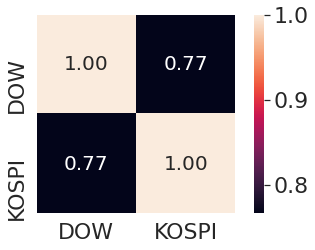

In [27]:
col_name = ['DOW','KOSPI']

# 레이블의 폰트 사이즈를 조정
sns.set(font_scale=2.0)
test_heatmap = sns.heatmap(corr.values, # 데이터
                           cbar = True, # 오른쪽 컬러 막대 출력 여부
                           annot = True, # 차트에 숫자를 보여줄 것인지 여부
                           annot_kws={'size' : 20}, # 숫자 출력 시 숫자 크기 조절
                           fmt = '.2f', # 숫자의 출력 소수점자리 개수 조절
                           square = 'True', # 차트를 정사각형으로 할 것인지
                           yticklabels=col_name, # y축에 컬럼명 출력
                           xticklabels=col_name) # x축에 컬럼명 출력
plt.tight_layout()
plt.show()

### pairplot

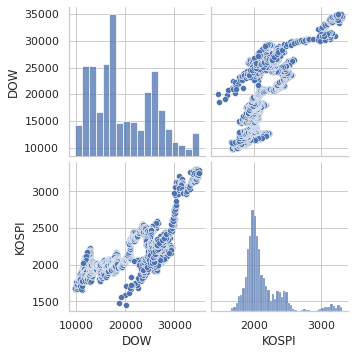

In [28]:
sns.set(style='whitegrid')
sns.pairplot(df)
plt.show()